In [32]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input, Add, Reshape,Conv2D,MaxPooling2D,ZeroPadding2D,experimental,AveragePooling2D,Concatenate,Dropout,Activation
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
import numpy as np
import keras
from keras import layers
from PIL import Image
import cv2

In [46]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [47]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [34]:
X_train = []
for img in x_train:
    proc_img = np.array(Image.fromarray(img).convert('L'))
    proc_img = proc_img/255.0
    X_train.append(proc_img)
X_train = np.array(X_train)    
X_test = []
for img in x_test:
    proc_img = np.array(Image.fromarray(img).convert('L'))
    proc_img = proc_img/255.0
    X_test.append(proc_img)
X_test = np.array(X_test)

In [35]:
X_train = np.expand_dims(X_train,axis = -1)
X_test = np.expand_dims(X_test,axis = -1)

In [18]:
mean = []
for i in range(10):
  pos = np.where(y_train == i)
  mean.append((np.sum(X_train[pos[0]],axis = 0))/pos[0].shape[0])

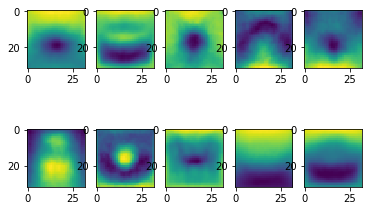

In [21]:
_, axs = plt.subplots(2,5)
axs = axs.flatten()
for i, ax in enumerate(axs):
  ax.imshow(mean[i][:,:,0])
plt.show()# 

In [36]:
mean = np.array(mean)
mean = mean.astype(np.float32)
X_train = X_train.astype(np.float32)

In [23]:
y_train_ccoeff = []
for img in X_train:
    ccoeff = []
    for i in range(10):
        ccoeff.append(cv2.matchTemplate(mean[i],img,cv2.TM_CCOEFF_NORMED))
    y_train_ccoeff.append(ccoeff)

In [24]:
y_train_ccoeff = np.array(y_train_ccoeff)

In [26]:
y_train_ccoeff = np.squeeze(y_train_ccoeff,axis = -1)
y_train_ccoeff = np.squeeze(y_train_ccoeff,axis = -1)

In [27]:
y_train_ccoeff.shape

(50000, 10)

In [87]:
input = Input((32,32,1))
inputB = Input((10))
outknow = Dense(10)(inputB)
c1l1  = Conv2D(32,3,(1,1),padding = 'same',activation='relu')(input)
c1l2  = Conv2D(32,3,(1,1),padding = 'same',activation='relu')(c1l1)
ces2  = Add()([c1l2, c1l1])
c1l3  = Conv2D(32,3,(1,1),padding = 'same',activation='relu')(ces2)
ces3  = Add()([c1l3, ces2])
ces3  = Flatten()(ces3)
ces3  = Dense(10)(ces3)
ces3  = Add()([ces3,outknow])
ces3  = Activation('softmax')(ces3)
model2 = Model(inputs=[input, inputB], outputs=ces3)

In [126]:
inputC = Input((10,))
new = model2.layers[9](inputC)
model_test = Model(inputs=inputC, outputs=new)

In [127]:
a = np.zeros(10)

In [131]:
np.expand_dims(a,axis = 1).shape

(10, 1)

In [137]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [138]:
model_test(np.expand_dims(y_train[1],axis = 0))

<tf.Tensor: id=726370, shape=(1, 10), dtype=float32, numpy=
array([[-7.704445 , -8.628773 , -6.8147492, -7.9286537, -7.3248615,
        -7.1917386, -6.331643 , -7.640741 , -7.6377983,  8.42952  ]],
      dtype=float32)>

In [ ]:
-21.404982, -21.47319 , -22.324938, -20.061718, -20.96634 ,
        -20.900791, -20.31894 , -20.549143, -19.980066, -20.50299 ]],

In [88]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint_filepath = 'cifar10_expert_labels'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,monitor='val_accuracy',mode='max',
                                                               save_best_only=True)
history = model2.fit(x = [X_train,y_train],y = y_train,epochs = 50,callbacks = [model_checkpoint_callback],
                     validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 259s 6ms/sample - loss: 1.0429 - accuracy: 0.7126 - val_loss: 0.4656 - val_accuracy: 0.9386
Epoch 2/50
45000/45000 [==============================] - 238s 5ms/sample - loss: 0.2737 - accuracy: 0.9741 - val_loss: 0.1614 - val_accuracy: 0.9922
Epoch 3/50
45000/45000 [==============================] - 223s 5ms/sample - loss: 0.0971 - accuracy: 0.9971 - val_loss: 0.0760 - val_accuracy: 0.9978
Epoch 4/50
45000/45000 [==============================] - 220s 5ms/sample - loss: 0.0405 - accuracy: 0.9998 - val_loss: 0.0434 - val_accuracy: 0.9988
Epoch 5/50
45000/45000 [==============================] - 216s 5ms/sample - loss: 0.0186 - accuracy: 1.0000 - val_loss: 0.0236 - val_accuracy: 0.9994
Epoch 6/50
45000/45000 [==============================] - 224s 5ms/sample - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0168 - val_accuracy: 0.9984
Epoch 7/50
45000/45000 [===========================

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 32, 32, 32)   320         input_11[0][0]                   
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 32, 32, 32)   9248        conv2d_15[0][0]                  
__________________________________________________________________________________________________
add_15 (Add)                    (None, 32, 32, 32)   0           conv2d_16[0][0]                  
                                                                 conv2d_15[0][0]            

In [134]:
x     = model2.layers[0].output
c1l1  = model2.layers[1](x)
c1l2  = model2.layers[2](c1l1)
ces2  = model2.layers[3]([c1l2, c1l1])
c1l3  = model2.layers[4](ces2)
ces3  = model2.layers[5]([c1l3, ces2])
ces3  = model2.layers[6](ces3)
ces3  = model2.layers[8](ces3)
#ces3  = Add()([ces3,inputB])
#ces3  = model2.layers[11](ces3)
model_without_ADD_Activation = Model(inputs=model2.layers[0].input, outputs=ces3)

In [100]:
model_without_ADD.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_without_ADD.evaluate(X_test,y_test,verbose = 2)

10000/1 - 17s - loss: 2.2729 - accuracy: 0.2164


[2.390258740234375, 0.2164]

In [135]:
model_without_ADD_Activation(np.expand_dims(X_test[0],axis = 0))

W0925 22:04:52.928970 11576 base_layer.py:1814] Layer conv2d_15 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



<tf.Tensor: id=726365, shape=(1, 10), dtype=float32, numpy=
array([[-21.404982, -21.47319 , -22.324938, -20.061718, -20.96634 ,
        -20.900791, -20.31894 , -20.549143, -19.980066, -20.50299 ]],
      dtype=float32)>

In [124]:
model2.layers[9]

In [76]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.evaluate(X_test,y_test,verbose = 2)

10000/1 - 19s - loss: 5.4008 - accuracy: 0.5714


[4.840938586044311, 0.5714]

In [19]:
model = tf.keras.models.load_model('Coeff')

In [61]:
y_test_ccoeff = []
for img in X_test.astype(np.float32):
    ccoeff = []
    for i in range(10):
        ccoeff.append(cv2.matchTemplate(mean[i],img,cv2.TM_CCOEFF_NORMED))
    y_test_ccoeff.append(ccoeff)

In [62]:
y_test_ccoeff = np.array(y_test_ccoeff)

In [71]:
y_test_ccoeff = np.squeeze(y_test_ccoeff,axis = -1)

In [25]:
x_test = np.expand_dims(x_test,axis = -1)

In [26]:
#x_test = np.expand_dims(x_test,axis = -1)
model.evaluate([x_test,y_test_ccoeff],y_test, verbose = 2)

10000/1 - 8s - loss: 0.1281 - accuracy: 0.9824


[0.2561554617920786, 0.9824]

In [115]:
x_train=  np.expand_dims(x_train,axis = -1)

In [72]:
preds = np.argmax(y_test_ccoeff,axis = -1)

In [77]:
pred = 0
class_wise = []
for y1,y2 in zip(y_test,preds):
    if (y1 == y2):
        class_wise.append(y1)
        pred = pred + 1

In [80]:
class_wise = np.array(class_wise)
unique, counts = np.unique(class_wise, return_counts=True)
print(unique,counts)
#airplane car bird cat deer dog frog horse ship truck

[0 1 2 3 4 5 6 7 8 9] [152 162 222  98 238 370  97 210 471 296]


In [74]:
pred

2316

In [18]:
cd knowledgevision


C:\Users\DeLL\desktop\knowledgevision
